# K-Means appliquées aux anneaux donées en 3D

## Importation des librairies 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering

(600, 3)


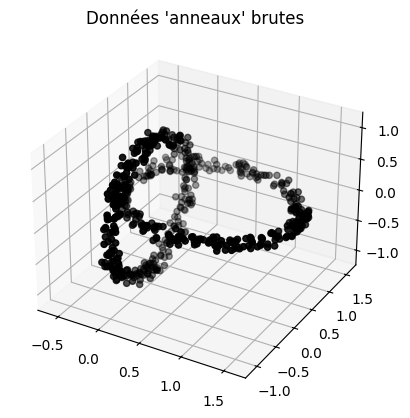

In [3]:
X = np.loadtxt("anneaux.txt", skiprows=1, usecols=(1,2,3))
print(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c='black', s=20)
ax.set_title("Données 'anneaux' brutes")  # <-- titre ajouté
plt.show()

## K-Means

Text(0.5, 1.0, 'K-Means — PCA 2D')

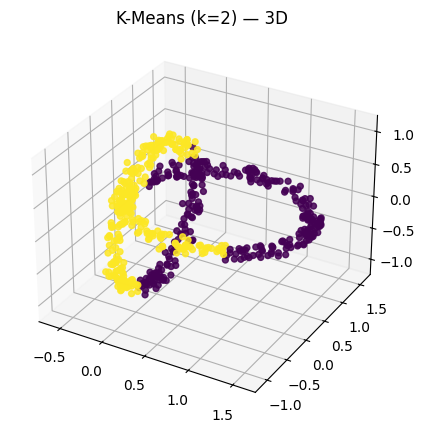

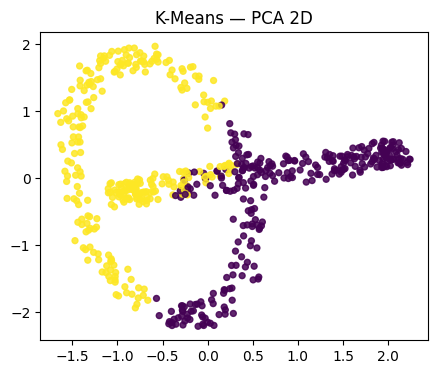

In [4]:
#Standardisation des données 
Xs = StandardScaler().fit_transform(X)

#K-Means et affichage 
k = 2
km = KMeans(n_clusters=k, n_init="auto", random_state=0)
lab_km = km.fit_predict(Xs)

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], c=lab_km, cmap="viridis", s=18, alpha=0.85)
ax.set_title(f"K-Means (k={k}) — 3D")

Z = PCA(n_components=2, random_state=0).fit_transform(Xs)
plt.figure(figsize=(5,4))
plt.scatter(Z[:,0], Z[:,1], c=lab_km, cmap="viridis", s=18, alpha=0.85)
plt.title("K-Means — PCA 2D")

## Spectral clustering

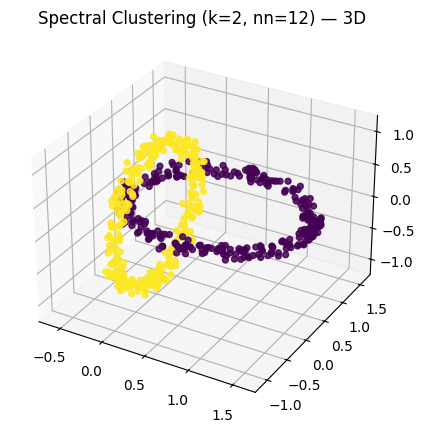

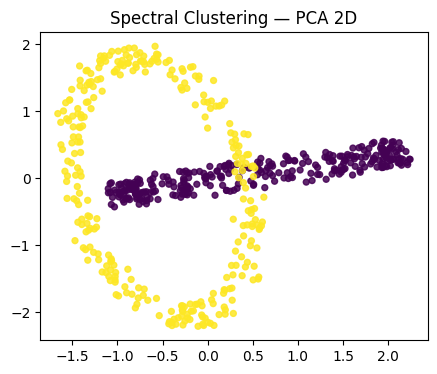

In [5]:
#Spectral Clustering et affichage
sc = SpectralClustering(
    n_clusters=k, affinity="nearest_neighbors",
    n_neighbors=12, assign_labels="kmeans", random_state=0
)
lab_sc = sc.fit_predict(Xs)

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], c=lab_sc, cmap="viridis", s=18, alpha=0.85)
ax.set_title(f"Spectral Clustering (k={k}, nn=12) — 3D")

Z = PCA(n_components=2, random_state=0).fit_transform(Xs)
plt.figure(figsize=(5,4))
plt.scatter(Z[:,0], Z[:,1], c=lab_sc, cmap="viridis", s=18, alpha=0.85)
plt.title("Spectral Clustering — PCA 2D")

plt.show()

L’application de K-Means et du Spectral Clustering aux données en anneaux met en évidence des différences importantes entre les deux méthodes. 
Visuellement, K-Means a tendance à découper les structures circulaires de manière artificielle. Cela s’explique par le fait que cet algorithme repose sur une partition en clusters convexes, ce qui n’est pas adapté à des formes non sphériques comme des anneaux imbriqués. En conséquence, les frontières de clusters sont mal placées et certains points appartenant à un même anneau se retrouvent séparés.

À l’inverse, le Spectral Clustering exploite les relations de voisinage entre points et permet de capturer la topologie réelle des données. Dans ce cas, il identifie correctement chaque anneau comme un cluster distinct. Ce résultat est confirmé visuellement par une bien meilleure séparation entre les classes, clustering adapté aux non convexes.